In [1]:
#####JAN - MAY 2017: VIDEO
import pandas as pd
from pandas.stats.api import ols
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import math
%matplotlib inline

###load all the datasets
##meta_data file
all_df = pd.read_csv('/Users/eshwarchandrasekharan/Downloads/jan_may_2017_video')
all_df = all_df.fillna(0)

In [2]:
all_df.columns

Index(['buzz_external_id', 'buzz_post_parent_external_id',
       'buzz_post_created_at', 'buzz_account_display_name',
       'buzz_post_type_name', 'buzz_post_buzz_id', 'buzz_campaign_uri',
       'buzz_campaign_name', 'ext_table1_stats_date', 'ext_external_id',
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan', 'ext_table1_firsthour_stats_date',
       'ext_table1_video_complete_views_30s_organic',
       'ext_table1_video_views_10s_organic',
       'ext_twodays_consumptions_by_type__link_clicks',
       'ext_twodays_stories_by_action_type__share', 'ext_twodays_stats_date',
       'ext_twodays_video_complete_views_

Without cross-promotion features
Testing for shares (10s views organic)!
(707, 12) (707,)
(177, 12) (177,)


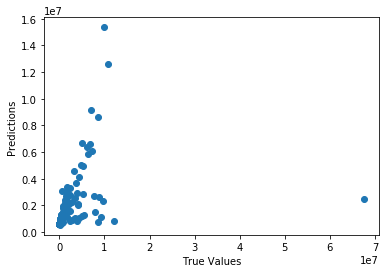

Predict  share
Trial run - Score: 0.104365565807
Cross-validated scores: [  7.36987672e-01   4.58699523e-01   4.35073299e-01   6.20726390e-01
   4.83424152e-02   3.23448759e-01   1.03870707e-01   4.25694405e-01
  -1.05547630e+02   4.43104561e-01]
Mean accuracy =  -10.1951681844
Cross-Predicted Accuracy (R2): -8.31445057898
Mean Absolute Error:  2310710.7393
Mean values:  1897760.7963800905  | percent error:  1.21759852122
Testing for clicks!
(707, 12) (707,)
(177, 12) (177,)


/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


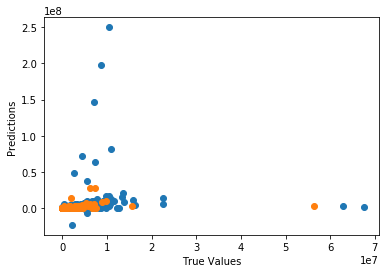

Predict  clicks
Trial run - Score: -0.136206305939
Cross-validated scores: [  7.31919518e-01   4.13999652e-01   4.30485584e-01   6.01480035e-01
   5.04667100e-02   3.21040198e-01   8.56632661e-02   4.22120467e-01
  -1.21307657e+02   4.55356225e-01]
Mean accuracy =  -11.7795125138
Cross-Predicted Accuracy (R2): -7.42550274688
Mean Absolute Error:  1790980.18378
Mean values:  1441762.7556561085  | percent error:  1.24221559806
                                                0           0
0    ext_table1_consumptions_by_type__link_clicks  159.593197
1   ext_table1_consumptions_by_type__other_clicks    0.501544
2                 ext_table1_reactions_like_total  261.337721
3      ext_table1_stories_by_action_type__comment    4.387162
4         ext_table1_stories_by_action_type__like -152.370792
5        ext_table1_stories_by_action_type__share   30.019292
6                          ext_table1_engaged_fan   -9.097723
7                            ext_table1_fan_reach    3.009789
8            

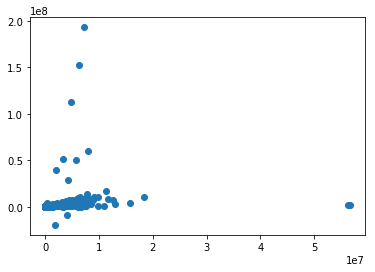

In [3]:
###PREDICTION: Cross-validation
train = all_df
##drop dups
train = train.sort_values('ext_table1_firsthour_stats_date', ascending = False).drop_duplicates(subset=['buzz_post_buzz_id', 'ext_external_id'], keep = 'last')

print("Without cross-promotion features")

features = [
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan',
       ####video views features
       'ext_table1_video_complete_views_30s_organic',
       'ext_table1_video_views_10s_organic',
               ]
# alt_inf = len(all_pages) + 1
# train = train.replace(math.inf, alt_inf)

# ####add the category variable for each of the pages in col_pages
# for pg in all_pages:
#     features.append(pg)

###generate DFs for analysis - X and Y
df = train[features]

y_clicks = train['ext_twodays_video_complete_views_30s_organic']
y_share = train['ext_twodays_video_views_10s_organic']

metric = 'share'
# metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares (10s views organic)!")
else:
    y = y_clicks
    print("Testing for clicks  30s views organic)!")

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print("Predict ", metric)
print("Trial run - Score:", model.score(X_test, y_test))

###prediction with cross validation
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# 10-fold CV
scores = cross_val_score(model, df, y, cv = 10)
print("Cross-validated scores:", scores)
print("Mean accuracy = ", scores.mean())


# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy (R2):", accuracy)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
print("Mean values: ", y.mean(), " | percent error: ",  mean_absolute_error(y, predictions)/y.mean())

# metric = 'share'
metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print("Predict ", metric)
print("Trial run - Score:", model.score(X_test, y_test))

###prediction with cross validation
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# 10-fold CV
scores = cross_val_score(model, df, y, cv = 10)
print("Cross-validated scores:", scores)
print("Mean accuracy = ", scores.mean())


# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy (R2):", accuracy)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
print("Mean values: ", y.mean(), " | percent error: ",  mean_absolute_error(y, predictions)/y.mean())

###get coefficients
import numpy as np
print(pd.concat([pd.DataFrame(df.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1))

In [4]:
#####REGRESSION: without cross-promotion

train = all_df
##drop dups
train = train.sort_values('ext_table1_firsthour_stats_date', ascending = False).drop_duplicates(subset=['buzz_post_buzz_id', 'ext_external_id'], keep = 'last')

features = [
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan',
                 ####video views features
       'ext_table1_video_complete_views_30s_organic',
       'ext_table1_video_views_10s_organic',
    ]

####add the category variable for each of the pages in col_pages
# for pg in all_pages:
#     features.append(pg)

print('10sec view performance')
res = ols(y = train['ext_twodays_video_views_10s_organic'], x = train[features])
print(res)

print('30sec view performance')

###overall 30s views
res = ols(y = train['ext_twodays_video_complete_views_30s_organic'], x = train[features])
print(res)

10sec view performance


/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <ext_table1_consumptions_by_type__link_clicks>
             + <ext_table1_consumptions_by_type__other_clicks> + <ext_table1_reactions_like_total>
             + <ext_table1_stories_by_action_type__comment>
             + <ext_table1_stories_by_action_type__like> + <ext_table1_stories_by_action_type__share>
             + <ext_table1_engaged_fan> + <ext_table1_fan_reach>
             + <ext_table1_impressions> + <ext_table1_impressions_fan>
             + <ext_table1_video_complete_views_30s_organic> + <ext_table1_video_views_10s_organic>
             + <intercept>

Number of Observations:         884
Number of Degrees of Freedom:   13

R-squared:         0.2741
Adj R-squared:     0.2641

Rmse:          3540367.8942

F-stat (12, 871):    27.4127, p-value:     0.0000

Degrees of Freedom: model 12, resid 871

-----------------------Summary of Estimated Coefficients------------------------
     

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
####CROSS-PROMOTION FEATURES INCLUDED

In [7]:
df = all_df.sort_values('ext_table1_firsthour_stats_date', ascending = False).drop_duplicates(subset=['buzz_post_buzz_id', 'ext_external_id'], keep = 'last')

all_pages = list(df.buzz_account_display_name.unique())
print("Total pages considered: ", len(all_pages))

def get_cross_posted_pages(x):
        tf = df[df.buzz_post_buzz_id == x].sort_values('buzz_post_created_at', ascending = 1)
        return tf.buzz_account_display_name.unique()

df['cross_promotion_pages'] = df['buzz_post_buzz_id'].apply(get_cross_posted_pages)

def generate_cat_pages(x, y):
        if(y in x):
            return list(x).index(y) + 1
        else:
            return math.inf

###categorical features for pages where the link was shared
for pag in all_pages:
#     print("Getting for ", pag)
    df[pag] = df['cross_promotion_pages'].apply(generate_cat_pages, y = pag)

df.to_csv('jan_may_2017_video_cross_posting_info.csv', index = False)

Total pages considered:  45


WITH cross-promotion features
Testing for shares (10s views organic)!
(707, 57) (707,)
(177, 57) (177,)


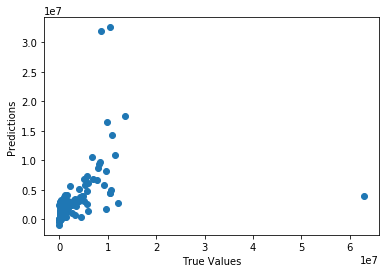

Predict  share
Trial run - Score: 0.0463248160533
Cross-validated scores: [  5.65290548e-01  -2.39163989e-01  -7.33779961e-02   5.88793247e-01
   2.82306665e-02   2.51992195e-02   1.60007792e-01   4.56527756e-01
  -8.21848302e+01   5.17985010e-01]
Mean accuracy =  -8.01553379473
Cross-Predicted Accuracy (R2): -6.44071740399
Mean Absolute Error:  2132974.01485
Mean values:  1897760.7963800905  | percent error:  1.12394250051
Testing for clicks!
(707, 57) (707,)
(177, 57) (177,)


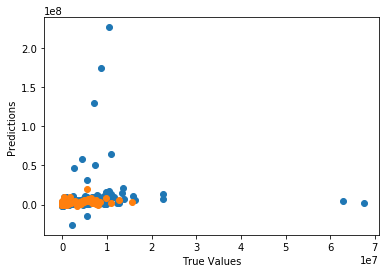

Predict  clicks
Trial run - Score: 0.177593734243
Cross-validated scores: [  5.39426959e-01  -3.96371190e-01  -7.70184903e-02   5.59905246e-01
   2.38548883e-02  -1.49126854e-01   1.37315847e-01   4.49481023e-01
  -9.36555649e+01   5.19072620e-01]
Mean accuracy =  -9.2049024832
Cross-Predicted Accuracy (R2): -5.70766694639
Mean Absolute Error:  1656855.31343
Mean values:  1441762.7556561085  | percent error:  1.14918720638
                                                0              0
0    ext_table1_consumptions_by_type__link_clicks     -79.575373
1   ext_table1_consumptions_by_type__other_clicks     -28.682590
2                 ext_table1_reactions_like_total     295.077355
3      ext_table1_stories_by_action_type__comment     -66.069736
4         ext_table1_stories_by_action_type__like    -273.367340
5        ext_table1_stories_by_action_type__share     301.419384
6                          ext_table1_engaged_fan      25.453024
7                            ext_table1_fan_reach    

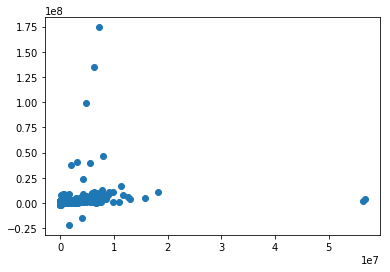

In [9]:
###PREDICTION TASK - with cross-promotion
###Cross-validation
train = pd.read_csv('jan_may_2017_video_cross_posting_info.csv')
##drop dups
# train = train.sort_values('ext_table1_firsthour_stats_date', ascending = False).drop_duplicates(subset=['buzz_post_buzz_id', 'ext_external_id'], keep = 'last')

print("WITH cross-promotion features")

features = [
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan',
                  ####video views features
       'ext_table1_video_complete_views_30s_organic',
       'ext_table1_video_views_10s_organic',
               ]

alt_inf = len(all_pages) + 1
train = train.replace(math.inf, alt_inf)

# ####add the category variable for each of the pages in col_pages
for pg in all_pages:
    features.append(pg)

###generate DFs for analysis - X and Y
df = train[features]


y_clicks = train['ext_twodays_video_complete_views_30s_organic']
y_share = train['ext_twodays_video_views_10s_organic']

metric = 'share'
# metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares (10s views organic)!")
else:
    y = y_clicks
    print("Testing for clicks  30s views organic)!")
    
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print("Predict ", metric)
print("Trial run - Score:", model.score(X_test, y_test))

###prediction with cross validation
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# 10-fold CV
scores = cross_val_score(model, df, y, cv = 10)
print("Cross-validated scores:", scores)
print("Mean accuracy = ", scores.mean())


# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy (R2):", accuracy)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
print("Mean values: ", y.mean(), " | percent error: ",  mean_absolute_error(y, predictions)/y.mean())

# metric = 'share'
metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print("Predict ", metric)
print("Trial run - Score:", model.score(X_test, y_test))

###prediction with cross validation
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# 10-fold CV
scores = cross_val_score(model, df, y, cv = 10)
print("Cross-validated scores:", scores)
print("Mean accuracy = ", scores.mean())


# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy (R2):", accuracy)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
print("Mean values: ", y.mean(), " | percent error: ",  mean_absolute_error(y, predictions)/y.mean())
###get coefficients
import numpy as np
print(pd.concat([pd.DataFrame(df.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1))

In [ ]:
#####REGRESSION: without cross-promotion

train = all_df
##drop dups
train = train.sort_values('ext_table1_firsthour_stats_date', ascending = False).drop_duplicates(subset=['buzz_post_buzz_id', 'ext_external_id'], keep = 'last')

features = [
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan',
                 ####video views features
       'ext_table1_video_complete_views_30s_organic',
       'ext_table1_video_views_10s_organic',
    ]

####add the category variable for each of the pages in col_pages
# for pg in all_pages:
#     features.append(pg)
alt_inf = len(all_pages) + 1
train = train.replace(math.inf, alt_inf)

# ####add the category variable for each of the pages in col_pages
for pg in all_pages:
    features.append(pg)

print('10sec view performance')
res = ols(y = train['ext_twodays_video_views_10s_organic'], x = train[features])
print(res)

print('30sec view performance')

###overall 30s views
res = ols(y = train['ext_twodays_video_complete_views_30s_organic'], x = train[features])
print(res)